# Clustering

## Install and Import the Libraries

Mount Google Drive and move the working folder to the one containing the dataset (**Note:** this may have to be changed according to the structure of your folders).

In [1]:
import os
from google.colab import drive

# Mount the Google drive storage
drive.mount('/content/drive')

# Move to the directory with the notebooks and the data set
# (note, you may need to change this path such that it leads to the folder that contains the dataset)
os.chdir('/content/drive/MyDrive/NLP_project/dataset/')

# Check the currect working directory
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/NLP_project/dataset'

Let's load the data from the json file

In [2]:
import json
def load_data(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data['data']

dataset = load_data('train-v2.0.json')

The structure of the training dataset is as follows:
- We have a list of main topics
- Each topic has a title and a list of paragraphs
- Each paragraph consists of a context and a list of questions and answers with the initial position of the first character of the answer in the context

The structure of the validation dataset is the same as that of the training dataset except that given a question we can have more plausible answers for that question, therefore we have a list of answers and start of positions for the first characters

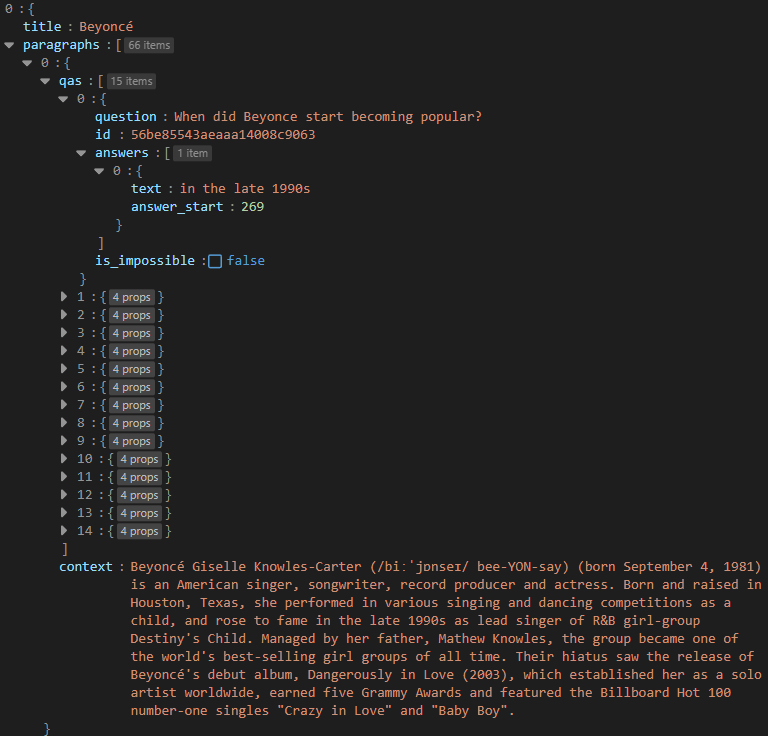


Let's see an example. The following prints the first document in the dataset, whcih is about Beyoncé.

In [3]:
print("Structure and content of the topic about Beyoncé")
dataset[0:1]

Structure and content of the topic about Beyoncé


[{'title': 'Beyoncé',
  'paragraphs': [{'qas': [{'question': 'When did Beyonce start becoming popular?',
      'id': '56be85543aeaaa14008c9063',
      'answers': [{'text': 'in the late 1990s', 'answer_start': 269}],
      'is_impossible': False},
     {'question': 'What areas did Beyonce compete in when she was growing up?',
      'id': '56be85543aeaaa14008c9065',
      'answers': [{'text': 'singing and dancing', 'answer_start': 207}],
      'is_impossible': False},
     {'question': "When did Beyonce leave Destiny's Child and become a solo singer?",
      'id': '56be85543aeaaa14008c9066',
      'answers': [{'text': '2003', 'answer_start': 526}],
      'is_impossible': False},
     {'question': 'In what city and state did Beyonce  grow up? ',
      'id': '56bf6b0f3aeaaa14008c9601',
      'answers': [{'text': 'Houston, Texas', 'answer_start': 166}],
      'is_impossible': False},
     {'question': 'In which decade did Beyonce become famous?',
      'id': '56bf6b0f3aeaaa14008c9602',
    

## Initial analysis

Let's look into the data to get initial understanding about it. For more details, look into the Data Visualization and Exploration notebook.

Let's see, for each title how many contexts are related to it.

In [4]:
sample_count = {}
for sample in dataset:
    print("{:60s} {:1s} {:4.1f}".format(sample['title'], ': ', len(sample['paragraphs'])))
    sample_count[sample['title']] = len(sample['paragraphs'])

Beyoncé                                                      :  66.0
Frédéric_Chopin                                              :  82.0
Sino-Tibetan_relations_during_the_Ming_dynasty               :  72.0
IPod                                                         :  60.0
The_Legend_of_Zelda:_Twilight_Princess                       :  32.0
Spectre_(2015_film)                                          :  43.0
2008_Sichuan_earthquake                                      :  77.0
New_York_City                                                :  148.0
To_Kill_a_Mockingbird                                        :  62.0
Solar_energy                                                 :  52.0
Kanye_West                                                   :  79.0
Buddhism                                                     :  149.0
American_Idol                                                :  127.0
Dog                                                          :  75.0
2008_Summer_Olympics_torch_rela

The following plot contains the chart of the previous information.

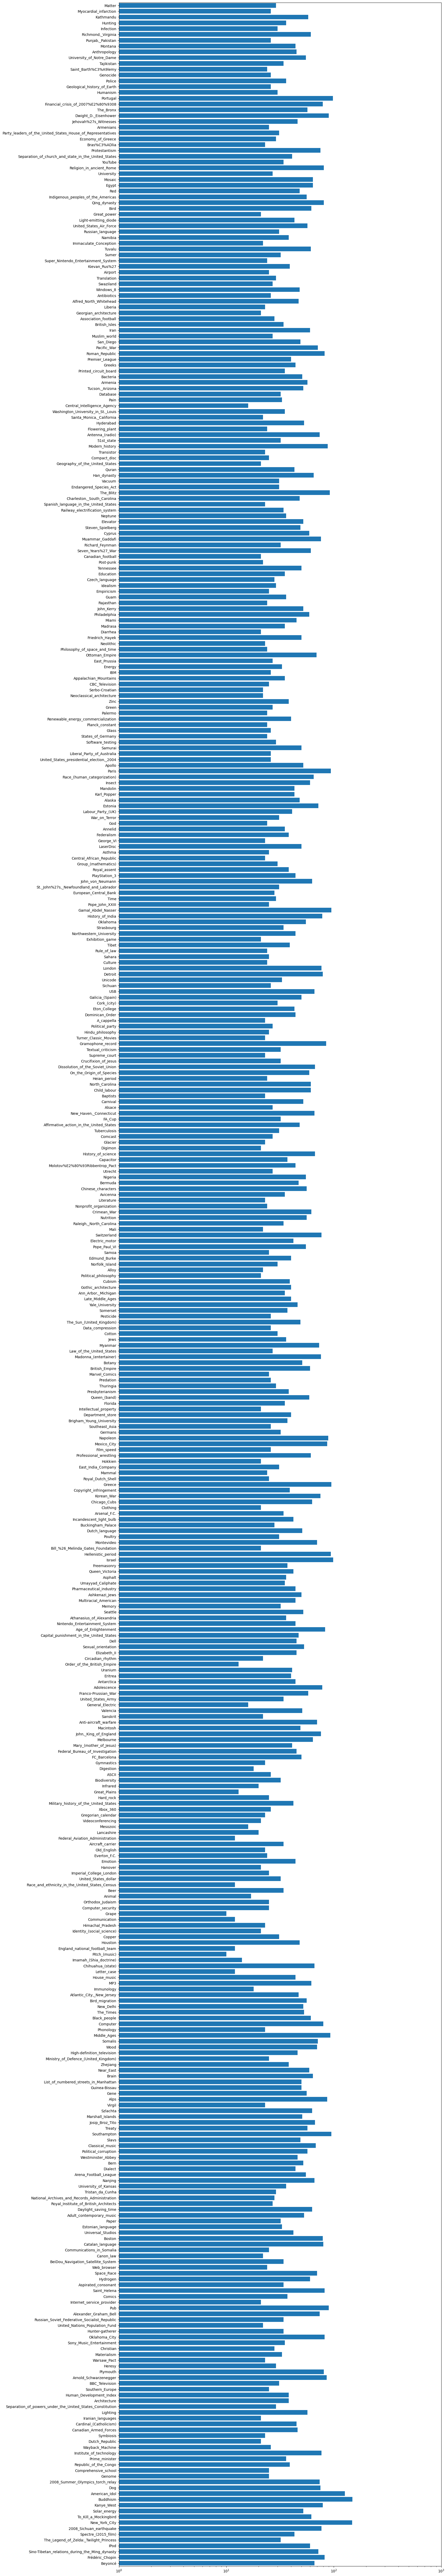

In [5]:
from matplotlib import pyplot as plt

plt.figure(figsize=(16, 128))
plt.barh(range(len(sample_count)), sample_count.values())
plt.yticks(range(len(sample_count)), sample_count.keys())
plt.xscale('log')
plt.xlim([1, 1000])
plt.autoscale(enable=False, axis='y')
plt.ylim([-0.5, len(sample_count)-0.5])
plt.show()
#plotting with logaritmic scale

## Vectorization

### Documents vectorization

Let's vectorize the contexts we have just extracted with `TfidfVectorizer` from Scikit-Learn in order to be able to perform clustering.

The tf-idf function is computed as follows: $\mathrm{tfidf}(t, d)=\mathrm{tf}(t, d) \cdot \mathrm{idf}(t)$
where $t$ is the term and $d$ is the document.
- $\mathrm{tf}(t, d)$ is the count of the term $t$ in the document $d$
- $\mathrm{idf}$ is inverse document frequency: $\mathrm{idf}(t) = \log{\frac{n + 1}{\mathrm{df}(t) + 1}} + 1$
- $n$ is the number of documents in collection
- $\mathrm{df}(t)$ is the document frequenci, i.e. the number of documents that contain the term $t$

The parameters of the vectorizer are:
 - `max_df`: ignore terms that have a document frequency strictly higher than the given threshold.
 - `min_df`: ignore terms that have a document frequency strictly lower than the given threshold.
 - `stop_words`: the language considered to remove the stopwords.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define the vectorizer
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
# create list of context
contexts = [paragraph['context'] for sample in dataset for paragraph in sample['paragraphs']] 
# run the vectorization
vectorizer.fit(contexts)

TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')

As result of the training of the vectorizer, we obtained also the vocabulary of the dataset. The lenght of it follows:

In [7]:
vocabulary = vectorizer.get_feature_names_out()

print(f"Length of vocabulary: {len(vocabulary)}")

Length of vocabulary: 20885


Let's see 100 random elements of our vocabulary

In [8]:
import random

sorted(random.sample(vocabulary.tolist(),100))

['1185',
 '1612',
 '1760s',
 '304',
 '416',
 '457',
 'additive',
 'aerial',
 'affairs',
 'alternately',
 'aperture',
 'arthur',
 'artificial',
 'asphalt',
 'asu',
 'attraction',
 'blogs',
 'books',
 'borrowings',
 'bundled',
 'caravan',
 'casus',
 'chamberlain',
 'chanting',
 'chemically',
 'conducts',
 'consonants',
 'controls',
 'cook',
 'cooperation',
 'cubists',
 'cycle',
 'demands',
 'determine',
 'equation',
 'equivalent',
 'federative',
 'forward',
 'fragile',
 'hanks',
 'hannover',
 'hiding',
 'ignored',
 'infectious',
 'intelligent',
 'isidore',
 'judgments',
 'laminated',
 'laterally',
 'leds',
 'lehman',
 'liquidity',
 'lute',
 'maturity',
 'mohieddin',
 'nazi',
 'nu',
 'occurs',
 'phd',
 'pirates',
 'plot',
 'poorly',
 'predetermined',
 'principalities',
 'prohibition',
 'prohibitions',
 'purpose',
 'pusan',
 'queens',
 'rationing',
 'receptors',
 'regulation',
 'retracted',
 'routine',
 'rupture',
 'seaway',
 'sergeant',
 'setbacks',
 'shah',
 'sichuan',
 'slash',
 'spirit

Let's vectorize our contexts and print the first one. The output can be interpreted in the following way:
 - the first number of the tuple is the context index.
 - the second one of the tuple is the feature index (so the index of the word in the vocabulary).
 - the last number is the tf-idf score for that specific word in that specific context.

In [9]:
vector_contexts = vectorizer.transform(contexts)
print(vector_contexts[0])

  (0, 20684)	0.09140297130900434
  (0, 20681)	0.05387083074523936
  (0, 20005)	0.07127204833070294
  (0, 19135)	0.05342852973072489
  (0, 18981)	0.10531284664955813
  (0, 17777)	0.13706584276240955
  (0, 17753)	0.11551482272292835
  (0, 17572)	0.11580203355271737
  (0, 17570)	0.11551482272292835
  (0, 17567)	0.22725824853313475
  (0, 17229)	0.07698344769411962
  (0, 17169)	0.10338741530025784
  (0, 16930)	0.1007932566763915
  (0, 16925)	0.08318127579702525
  (0, 16652)	0.10091402496779002
  (0, 16043)	0.09133364609381023
  (0, 15851)	0.08326736485622109
  (0, 15623)	0.09590727285161976
  (0, 15160)	0.10644710644770448
  (0, 14261)	0.09528579919604321
  (0, 13395)	0.06109972657875784
  (0, 12173)	0.15486287530217877
  (0, 11965)	0.10008603952878885
  (0, 11733)	0.20306202094091194
  (0, 11301)	0.09000311892056728
  :	:
  (0, 6904)	0.11216348574474486
  (0, 6138)	0.1267994332732129
  (0, 5802)	0.11551482272292835
  (0, 5724)	0.14994677932493028
  (0, 5718)	0.12793909830376515
  (0, 5464)

The words are here printed in decreasing order of tf-idf score.

In [10]:
sorted([(vocabulary[j], vector_contexts[0, j]) for j in vector_contexts[0].nonzero()[1]], key=lambda x: -x[1])

[('knowles', 0.3044572990075628),
 ('girl', 0.24321982637815262),
 ('singer', 0.22725824853313475),
 ('beyoncé', 0.2243269714894897),
 ('love', 0.20306202094091194),
 ('child', 0.1910987648983117),
 ('born', 0.18436941740648932),
 ('mathew', 0.15486287530217877),
 ('dangerously', 0.14994677932493028),
 ('group', 0.14216127304723084),
 ('bee', 0.14165011002000794),
 ('hiatus', 0.1403837054064635),
 ('songwriter', 0.13706584276240955),
 ('carter', 0.1351651476906861),
 ('crazy', 0.13345485728639417),
 ('baby', 0.13345485728639417),
 ('dancing', 0.12793909830376515),
 ('destiny', 0.1267994332732129),
 ('actress', 0.1267994332732129),
 ('grammy', 0.12472554102184882),
 ('singles', 0.11580203355271737),
 ('solo', 0.11551482272292835),
 ('singing', 0.11551482272292835),
 ('debut', 0.11551482272292835),
 ('fame', 0.1152323593975757),
 ('competitions', 0.1152323593975757),
 ('boy', 0.11414700153807537),
 ('billboard', 0.11362912426656738),
 ('earned', 0.11216348574474486),
 ('houston', 0.11059

Since the contexts are represented as vectors, we can apply dot product to compute the similarity between them. We can observe that the similarity of a context with itself is 100% as expected, the simlarity wih a context belonging to the same title is non-zero, while the similarity with a completely different context is zero.

In [11]:
print(vector_contexts[0].multiply(vector_contexts[0]).sum())
print(vector_contexts[0].multiply(vector_contexts[2]).sum()) #makes sense because they are of the same title
print(vector_contexts[0].multiply(vector_contexts[1000]).sum())

1.0000000000000002
0.1972119637910952
0.0


The following cell computes the average size of the vocabulary of a document.

In [12]:
nonzero_count = vector_contexts.count_nonzero()
doc_count = vector_contexts.get_shape()[0]

print(f"Average document vocabulary size: {nonzero_count/doc_count}")

Average document vocabulary size: 48.39500919359075


Let's retrieve a document given a query exploiting the dot product.

In [13]:
import numpy as np

query = 'Beyoncé'
#query = 'US army'
#query = 'Trump'
#query = 'Australia'

query_vec = vectorizer.transform([query])[0] #vectorize the string.. 

index = np.argmax([query_vec.multiply(vector_contexts[i]).sum() for i in range(len(contexts))]) #..and search the more matching document with the query 
print(contexts[index])

In The New Yorker music critic Jody Rosen described Beyoncé as "the most important and compelling popular musician of the twenty-first century..... the result, the logical end point, of a century-plus of pop." When The Guardian named her Artist of the Decade, Llewyn-Smith wrote, "Why Beyoncé? [...] Because she made not one but two of the decade's greatest singles, with Crazy in Love and Single Ladies (Put a Ring on It), not to mention her hits with Destiny's Child; and this was the decade when singles – particularly R&B singles – regained their status as pop's favourite medium. [...] [She] and not any superannuated rock star was arguably the greatest live performer of the past 10 years." In 2013, Beyoncé made the Time 100 list, Baz Luhrmann writing "no one has that voice, no one moves the way she moves, no one can hold an audience the way she does... When Beyoncé does an album, when Beyoncé sings a song, when Beyoncé does anything, it's an event, and it's broadly influential. Right now

## K-Means

We will utilize the k-Means algorithm due to its widespread usage, speed, scalability, and reasonable resilience. The k-Means algorithm partitions the dataset into k circular clusters, with each cluster represented by the centroid of the data points it encompasses.

To employ the k-Means algorithm, we must determine the number of clusters in advance. To do this choice correctly we will apply the K-Elbow method.

Some imports will be needed:

In [14]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
import numpy as np

### K-Elbow

The K-Elbow method allows to chose the best value of k. It works by plotting the distortion score of each k in a specified range, allowing us to find the best k as the value between the intial sharp change and the last smooth change of the curve (which in fact seems an elbow).

  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
 

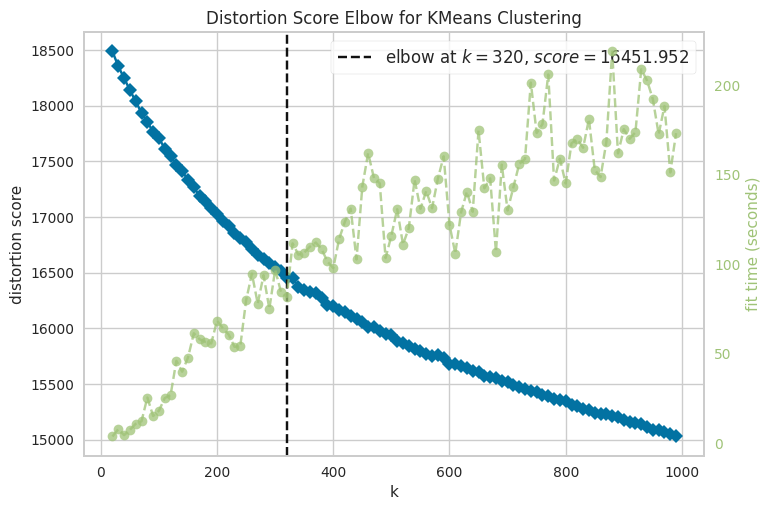

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans(max_iter=100, n_init=2, verbose=True)
visualizer = KElbowVisualizer(model, k=range(20, 1000, 10))

visualizer.fit(vector_contexts) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

The result is shown here:
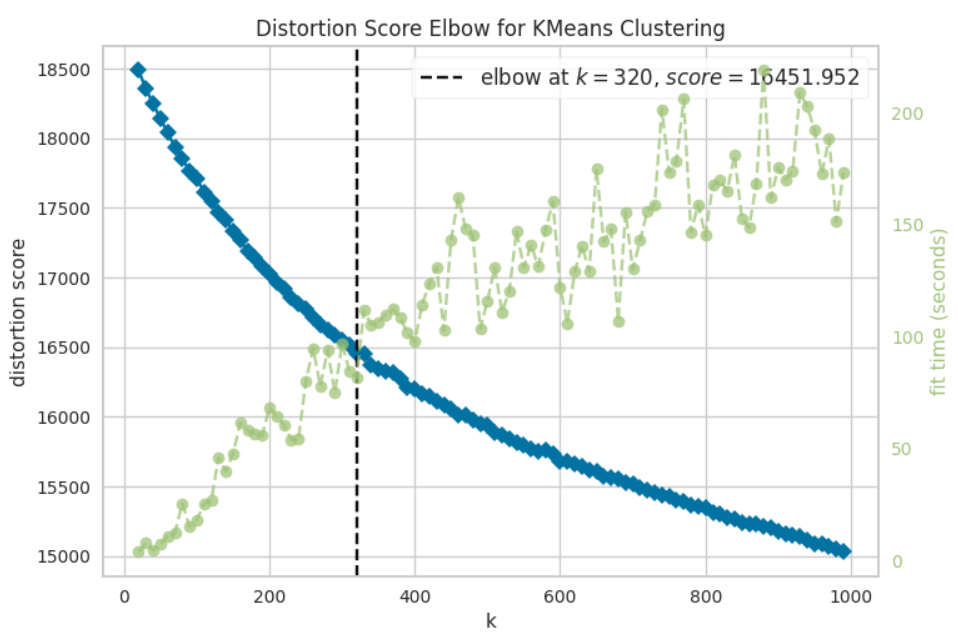

In this case the function we called computes itself the best value of k, which in this case is 320.

### K-Means Algorithm

Now we can apply K-Means algorithm using k=320 computed above.

In [15]:
k = 320 # obtained from elbow method

kmeans = KMeans(n_clusters=k, max_iter=100, n_init=2, verbose=True, random_state=2307) #starts from random initialization, so we do more iterations
kmeans.fit(vector_contexts)

Initialization complete
Iteration 0, inertia 30336.13612442594.
Iteration 1, inertia 16845.823530207785.
Iteration 2, inertia 16649.423036255823.
Iteration 3, inertia 16575.634844120417.
Iteration 4, inertia 16537.537146527815.
Iteration 5, inertia 16515.646005810137.
Iteration 6, inertia 16501.162985408373.
Iteration 7, inertia 16489.046249048748.
Iteration 8, inertia 16480.503386200973.
Iteration 9, inertia 16473.89310918937.
Iteration 10, inertia 16469.161324979872.
Iteration 11, inertia 16466.118937266536.
Iteration 12, inertia 16463.898610067503.
Iteration 13, inertia 16462.32423440791.
Iteration 14, inertia 16461.133540774692.
Iteration 15, inertia 16460.422460923055.
Iteration 16, inertia 16459.99011514768.
Iteration 17, inertia 16459.628490640003.
Iteration 18, inertia 16459.368488422624.
Iteration 19, inertia 16459.109357105215.
Iteration 20, inertia 16458.977299045684.
Iteration 21, inertia 16458.843221707335.
Iteration 22, inertia 16458.799540554624.
Iteration 23, inertia 16

KMeans(max_iter=100, n_clusters=320, n_init=2, random_state=2307, verbose=True)

In order to explore the results of our clustering algorithm we decided to print the most meaningful 20 terms of a cluster given its centroid.

In [16]:
# Get the centroid of a cluster
centroid = kmeans.cluster_centers_[7]

# Sort terms according to their weights 
# (argsort goes from lowest to highest, we reverse the order through slicing)
sorted_terms = centroid.argsort()[::-1]

# Print out the top 20 terms for the cluster
[vocabulary[j] for j in sorted_terms[:20]]

['characters',
 'character',
 'chinese',
 'unicode',
 'ascii',
 'standard',
 'code',
 'encodings',
 'encoding',
 'radical',
 'utf',
 'used',
 'words',
 'written',
 'use',
 'simplified',
 'strokes',
 'text',
 'dictionaries',
 'kanji']

We can observe that all terms are from the ancient history and in particular with facts related to the roman empire, that make sense.

Let's now use the dot product in order to find the most meaningful context for that cluster.

In [17]:
index = np.argmax([np.dot(centroid,vec) for vec in vector_contexts.toarray()])

print(contexts[index])

In China, which uses simplified Chinese characters, the Xiàndài Hànyǔ Chángyòng Zìbiǎo (现代汉语常用字表, Chart of Common Characters of Modern Chinese) lists 2,500 common characters and 1,000 less-than-common characters, while the Xiàndài Hànyǔ Tōngyòng Zìbiǎo (现代汉语通用字表, Chart of Generally Utilized Characters of Modern Chinese) lists 7,000 characters, including the 3,500 characters already listed above. GB2312, an early version of the national encoding standard used in the People's Republic of China, has 6,763 code points. GB18030, the modern, mandatory standard, has a much higher number. The New Hànyǔ Shuǐpíng Kǎoshì (汉语水平考试, Chinese Proficiency Test) covers approximately 2,600 characters at its highest level (level six).


It talks about roman empire so everything it's fine. 

Let's print the number of contexts belonging to the cluster number 7.

In [18]:
print(sum(kmeans.labels_ == 7))

90


In order to investigate more about the success of our clustering algorithm we print the first 66 context that belongs to the same article.

In [19]:
len(dataset[0]['paragraphs']) #number of contexts in the first cluster
for i in range(66): 
    print(f"context {i} is in cluster {kmeans.labels_[i]}") 
#this makes sense: we have same clusters for many documents in same title

context 0 is in cluster 262
context 1 is in cluster 262
context 2 is in cluster 262
context 3 is in cluster 72
context 4 is in cluster 72
context 5 is in cluster 72
context 6 is in cluster 262
context 7 is in cluster 72
context 8 is in cluster 262
context 9 is in cluster 72
context 10 is in cluster 262
context 11 is in cluster 262
context 12 is in cluster 262
context 13 is in cluster 72
context 14 is in cluster 262
context 15 is in cluster 72
context 16 is in cluster 262
context 17 is in cluster 72
context 18 is in cluster 72
context 19 is in cluster 262
context 20 is in cluster 72
context 21 is in cluster 72
context 22 is in cluster 72
context 23 is in cluster 262
context 24 is in cluster 72
context 25 is in cluster 72
context 26 is in cluster 72
context 27 is in cluster 72
context 28 is in cluster 72
context 29 is in cluster 72
context 30 is in cluster 72
context 31 is in cluster 154
context 32 is in cluster 72
context 33 is in cluster 72
context 34 is in cluster 72
context 35 is in 

We can see that most of the context of the first article have been clustered in the same cluster. This is a good result.

Now let's print the most meaningful 10 terms for each cluster sorted by importance.

In [20]:
print("Top terms per cluster:")
vocab = vectorizer.get_feature_names_out()

for i in range(kmeans.n_clusters):
    centroid = kmeans.cluster_centers_[i]    
    sorted_terms = centroid.argsort()[::-1]
    print(f"Cluster {i}:\t{[vocabulary[j] for j in sorted_terms[:10]]}")

Top terms per cluster:
Cluster 0:	['capacitors', 'voltage', 'capacitor', 'dielectric', 'current', 'circuits', 'transistor', 'circuit', 'plates', 'capacitance']
Cluster 1:	['british', 'britain', 'empire', 'war', 'colonies', 'independence', 'overseas', 'australia', 'united', 'india']
Cluster 2:	['hill', 'reclamation', 'present', 'city', 'hills', 'neighborhoods', 'beacon', 'verbs', 'west', 'brabant']
Cluster 3:	['india', 'empire', 'indian', 'dynasty', 'century', 'hindu', 'ce', 'subcontinent', 'period', 'magadha']
Cluster 4:	['million', 'total', '000', 'billion', 'estimated', 'largest', 'year', '12', 'greece', 'world']
Cluster 5:	['apollo', 'space', 'spacecraft', 'soyuz', 'rocket', 'launch', 'god', 'lunar', 'orbit', 'mission']
Cluster 6:	['group', 'genocide', 'groups', 'symmetry', 'theory', 'finite', 'international', 'elements', 'example', 'symmetries']
Cluster 7:	['characters', 'character', 'chinese', 'unicode', 'ascii', 'standard', 'code', 'encodings', 'encoding', 'radical']
Cluster 8:	[

It is possible to observe that almost all terms of each cluster seems to belong to the same field.

In the following cell the number of documents for each clusert is printed.

In [21]:
print('Number of docs in: ')

for i in range(kmeans.n_clusters):
    print(f"Cluster {i}: {np.sum(kmeans.labels_ == i)}")

Number of docs in: 
Cluster 0: 59
Cluster 1: 70
Cluster 2: 13
Cluster 3: 89
Cluster 4: 81
Cluster 5: 81
Cluster 6: 57
Cluster 7: 90
Cluster 8: 31
Cluster 9: 73
Cluster 10: 97
Cluster 11: 28
Cluster 12: 62
Cluster 13: 47
Cluster 14: 63
Cluster 15: 44
Cluster 16: 47
Cluster 17: 17
Cluster 18: 65
Cluster 19: 123
Cluster 20: 28
Cluster 21: 59
Cluster 22: 57
Cluster 23: 51
Cluster 24: 78
Cluster 25: 73
Cluster 26: 89
Cluster 27: 30
Cluster 28: 37
Cluster 29: 41
Cluster 30: 32
Cluster 31: 55
Cluster 32: 86
Cluster 33: 185
Cluster 34: 40
Cluster 35: 79
Cluster 36: 38
Cluster 37: 39
Cluster 38: 58
Cluster 39: 69
Cluster 40: 15
Cluster 41: 91
Cluster 42: 82
Cluster 43: 83
Cluster 44: 25
Cluster 45: 47
Cluster 46: 29
Cluster 47: 52
Cluster 48: 38
Cluster 49: 46
Cluster 50: 43
Cluster 51: 30
Cluster 52: 42
Cluster 53: 53
Cluster 54: 96
Cluster 55: 74
Cluster 56: 19
Cluster 57: 56
Cluster 58: 25
Cluster 59: 46
Cluster 60: 45
Cluster 61: 52
Cluster 62: 71
Cluster 63: 45
Cluster 64: 33
Cluster 65: 3

It is possible to notice that except for some outliers almost all clusters have number of elements in the same range.

#### Evaluation

In order to make a proper and empirical evaluation of the K-Means clustering algorithm all the most meaningful metrics of this field are printed. In particular:



*   `Within-cluster sum-of-squares`: inertia of the K-Means clustering
*   `Silhouette`: higher scores states for well defined clusters
*   `Homogeneity`: homogeneity is satisfied if all of the clusters contain only data points which are members of a single class
*   `Completeness`: completeness is satisfied if all the data points that are members of a given class are elements of the same cluster
*   `V-measure`: is the harmonic mean between homogeneity and completeness
*   `Adjusted Rand-Index`: computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

It's important to consider that all these metrics are computed with respet to the different articles identified by titles that we considered as labels for the clustering algorithm.




In [22]:
from sklearn import metrics

print("Intrinsic evaluation measures:")
print("Within-cluster sum-of-squares:", str(kmeans.inertia_)) #very wide clusters
print("Silhouette coefficient(Between-cluster sum-of-squares):", str(metrics.silhouette_score(vector_contexts, kmeans.labels_)))

titles = [sample['title'] for sample in dataset for i in range(0, len(sample['paragraphs']))]
print('Extrinsic evaluation measures:') #faster to compute
print("Homogeneity:", str(metrics.homogeneity_score(titles, kmeans.labels_))) #higher the better
print("Completeness:", str(metrics.completeness_score(titles, kmeans.labels_))) #higher the better
print("V-measure:", str(metrics.v_measure_score(titles, kmeans.labels_))) #higher the better
print("Adjusted Rand-Index:", str(metrics.adjusted_rand_score(titles, kmeans.labels_))) #[-0.5, 1] higher the better

Intrinsic evaluation measures:
Within-cluster sum-of-squares: 16458.78400712301
Silhouette coefficient(Between-cluster sum-of-squares): 0.030151193342830406
Extrinsic evaluation measures:
Homogeneity: 0.6700100549599427
Completeness: 0.7456197934894734
V-measure: 0.7057957408319709
Adjusted Rand-Index: 0.12166044579957325


### Minibatch K-Means Algorithm

Since we don't have a huge dataset, we wouldn't need to apply a mini-batch technique (which is an approximation of K-Means). But it's still interesting to see how much this algorithm has impact on the quality of the clusters.

In [23]:
from sklearn.cluster import MiniBatchKMeans

mb_kmeans = MiniBatchKMeans(n_clusters=k,batch_size=500, random_state=2307) #approximated version of k-means, which works with mini batches
mb_kmeans.fit(vector_contexts)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(batch_size=500, n_clusters=320, random_state=2307)

#### Evaluation

In [24]:
print("Intrinsic evaluation measures:")
print("Within-cluster sum-of-squares:", str(mb_kmeans.inertia_))
print("Silhouette coefficient:", str(metrics.silhouette_score(vector_contexts, mb_kmeans.labels_)))
print('Extrinsic evaluation measures:')
print("Homogeneity:", str(metrics.homogeneity_score(titles, mb_kmeans.labels_)))
print("Completeness:", str(metrics.completeness_score(titles, mb_kmeans.labels_)))
print("V-measure:", str(metrics.v_measure_score(titles, mb_kmeans.labels_)))
print("Adjusted Rand-Index:", str(metrics.adjusted_rand_score(titles, mb_kmeans.labels_)))

Intrinsic evaluation measures:
Within-cluster sum-of-squares: 17919.74663134805
Silhouette coefficient: -0.047829645907413613
Extrinsic evaluation measures:
Homogeneity: 0.24240976169893044
Completeness: 0.6246300673532402
V-measure: 0.34927213422850717
Adjusted Rand-Index: 0.004153501476007217


As expected most of the metrics shows lower performances.

### Visualization

Here our purpose is to show graphically the quality of the clustering in a 3-dimensional space. In order to achieve that we first need to apply SVD in order to obtain a 3D approximation of our data.

To guarantee a more understandable visualization we decided to consider in this representation only the first 300 contexts.

In [25]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(3) #we retaing the 3 most important dimensions. This is a linear approximation
reduced_data = svd.fit_transform(vector_contexts[0:300])

[x,y,z] = np.transpose(reduced_data)
[x,y,z]

[array([0.20694957, 0.23947525, 0.18765571, 0.20104559, 0.19724383,
        0.21167719, 0.17322217, 0.20432976, 0.17238013, 0.23221232,
        0.23678923, 0.17532917, 0.20718142, 0.2216471 , 0.27609653,
        0.19462111, 0.22248981, 0.21415613, 0.18429265, 0.2398789 ,
        0.11385581, 0.2874798 , 0.20000753, 0.29935534, 0.25833739,
        0.18785951, 0.27522587, 0.14564975, 0.16190826, 0.20899801,
        0.11644552, 0.10163496, 0.17217696, 0.23999452, 0.15058547,
        0.23489137, 0.12629968, 0.17492581, 0.21062755, 0.21773445,
        0.19080505, 0.21995716, 0.19687014, 0.19905057, 0.21126722,
        0.16967609, 0.22117915, 0.13773128, 0.1711399 , 0.15090899,
        0.2967348 , 0.18891668, 0.23057734, 0.25037534, 0.20861383,
        0.20218639, 0.2310408 , 0.20687535, 0.1493647 , 0.19165333,
        0.23168821, 0.21239711, 0.10416463, 0.1467756 , 0.23927043,
        0.228591  , 0.36458028, 0.26850482, 0.34420689, 0.25017143,
        0.2028496 , 0.17900541, 0.19481678, 0.11

In this first plot the contexts are colored according to the article they belong to.

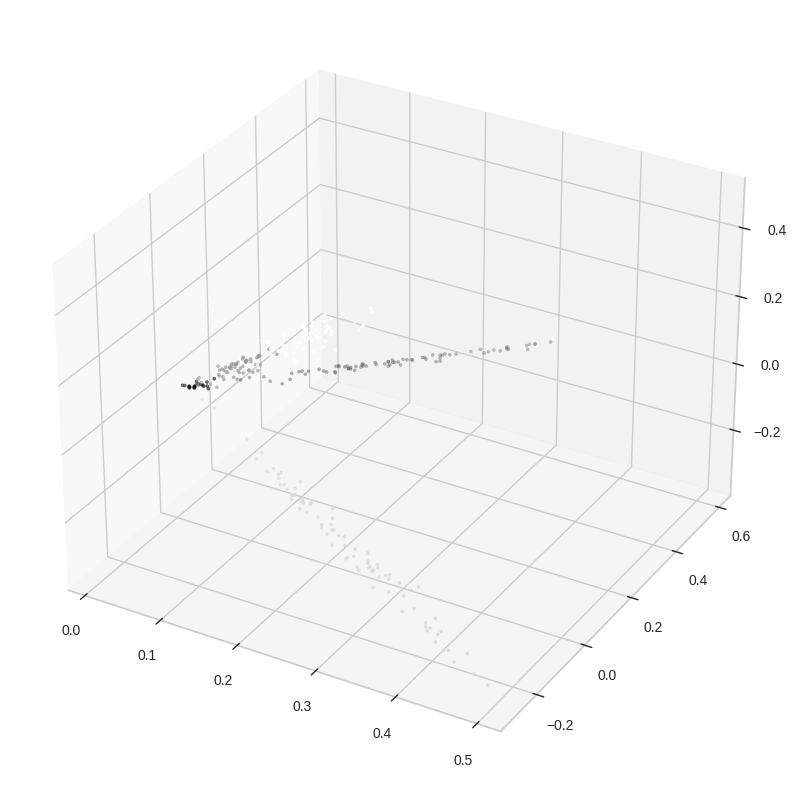

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=LabelEncoder().fit_transform(titles[0:300]), marker='.');

In the following plot we show context colored according to the cluster they belong to based on K-Means clusering results.

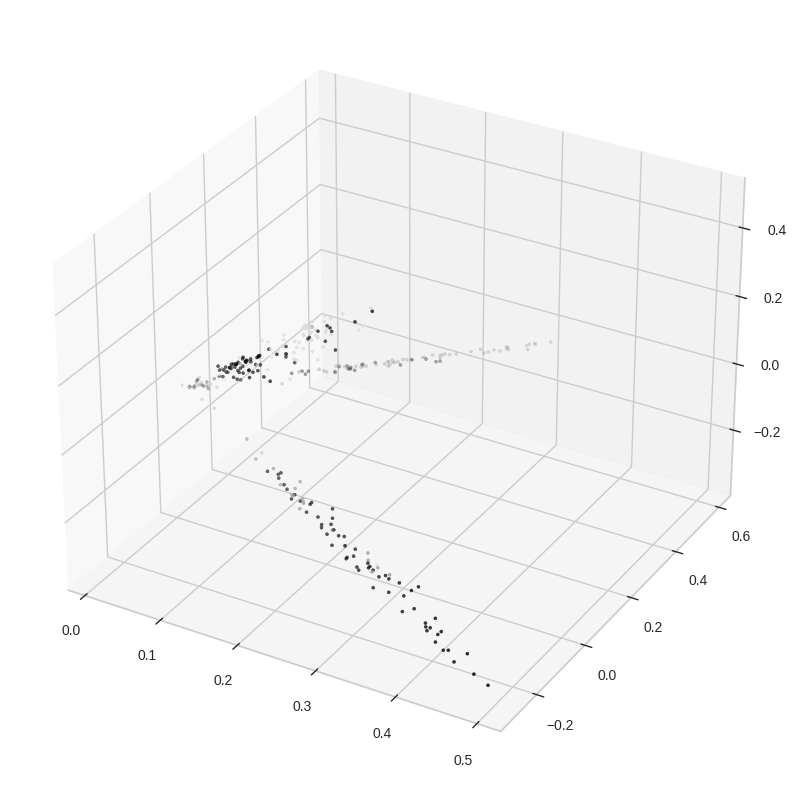

In [34]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=kmeans.labels_[0:300], marker='.'); #using labels from k-means

We can observe that contexts which belongs to the same cluster are near in the 3D space and are colored mostly the same.

## Topic Models

Topic modeling is a clustering technique for analyzing documents. Unlike k-means clustering, topic modeling allows documents to belong to multiple clusters called topics. The popular algorithm for topic modeling is Latent Dirichlet Allocation (LDA). We can use the sklearn implementation of LDA to learn a low-dimensional representation of documents. By splitting the data into training and test sets, we train the LDA model on the training data and transform new documents into the same representation. This approach helps us understand the topics in documents and their relationships across multiple clusters.

Let's start by splitting between training and test data.

In [35]:
from sklearn.model_selection import train_test_split

contexts_train, contexts_test, label_train, label_test = train_test_split(contexts, titles, test_size=0.3)
print('No. training docs:', len(contexts_train))
print('No. testing docs:', len(contexts_test))

No. training docs: 13324
No. testing docs: 5711


We now istantiate the vectorizer and vectorize our contexts.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', min_df=5, max_df=0.8)
vector_contexts_train = vectorizer.fit_transform(contexts_train)

Here we print the vocabulary size and we can observe that it is smaller with respect to the previous case which was about 20800. This make sense since we have a smaller training set due to the previous split.

In [37]:
vocabulary = vectorizer.get_feature_names_out()
len(vocabulary)

16795

Here we fit an LDA topic model to the dataset, choosing 60 as number of topics as an example.

### Latent Dirichlet Allocation

In [38]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=60, verbose=1, learning_method='online', max_iter=30)
lda.fit(vector_contexts_train)

iteration: 1 of max_iter: 30
iteration: 2 of max_iter: 30
iteration: 3 of max_iter: 30
iteration: 4 of max_iter: 30
iteration: 5 of max_iter: 30
iteration: 6 of max_iter: 30
iteration: 7 of max_iter: 30
iteration: 8 of max_iter: 30
iteration: 9 of max_iter: 30
iteration: 10 of max_iter: 30
iteration: 11 of max_iter: 30
iteration: 12 of max_iter: 30
iteration: 13 of max_iter: 30
iteration: 14 of max_iter: 30
iteration: 15 of max_iter: 30
iteration: 16 of max_iter: 30
iteration: 17 of max_iter: 30
iteration: 18 of max_iter: 30
iteration: 19 of max_iter: 30
iteration: 20 of max_iter: 30
iteration: 21 of max_iter: 30
iteration: 22 of max_iter: 30
iteration: 23 of max_iter: 30
iteration: 24 of max_iter: 30
iteration: 25 of max_iter: 30
iteration: 26 of max_iter: 30
iteration: 27 of max_iter: 30
iteration: 28 of max_iter: 30
iteration: 29 of max_iter: 30
iteration: 30 of max_iter: 30


LatentDirichletAllocation(learning_method='online', max_iter=30,
                          n_components=60, verbose=1)

#### Evaluation

We now evaluate the LDA model considering the resulting perplexity. 

Perplexity is a measure of how surprised or confused a language model is when it encounters new data. It is commonly used to evaluate the prediction performance of a language model. Perplexity calculates the average number of bits required to encode the test data using the model. It can also be interpreted as 2 raised to the power of the cross-entropy. To compute perplexity for a test dataset, we first need to vectorize the data before applying the calculation.

In [39]:
vector_contexts_test = vectorizer.transform(contexts_test)
lda.perplexity(vector_contexts_test)

12623.28195008109

Let's now print the 10 most important terms for each topic.

In [40]:
for i in range(len(lda.components_)):
    sorted_terms = lda.components_[i].argsort()[::-1]
    concatenated_terms = '[' + ', '.join(vocab[i] for i in sorted_terms[:10]) + ']'
    print (f'Topic {i + 1}:\t', concatenated_terms)

Topic 1:	 [fu, ft, bloodstream, blow, gettysburg, businesswoman, ghana, bona, connections, permit]
Topic 2:	 [alleles, loanwords, loads, bay, credibility, lengthy, mastered, cohesion, polyester, depots]
Topic 3:	 [bombs, bona, crashes, entropy, psychologists, psychology, imperfective, legislature, meter, pygidium]
Topic 4:	 [bombers, nude, ronnie, marco, given, crossroads, bombay, rumors, guides, disappointment]
Topic 5:	 [future, geographic, december, lumens, materially, mechanisms, rivals, layer, faisal, europeans]
Topic 6:	 [absent, doubts, dove, retreating, algonquian, absolutist, immense, join, anatomically, enemies]
Topic 7:	 [encyclical, encrypted, meditative, really, cnet, lehman, denote, futuristic, realizes, rested]
Topic 8:	 [mubarak, emerald, muawiya, homosexuality, derivatives, 551, fund, affluence, projectile, references]
Topic 9:	 [reference, elects, persisting, obelisk, randall, elementary, cuban, lancaster, obedience, abode]
Topic 10:	 [archaeopteryx, pop, gland, elect

The following plot visualize the prevalence of the words in each topic.

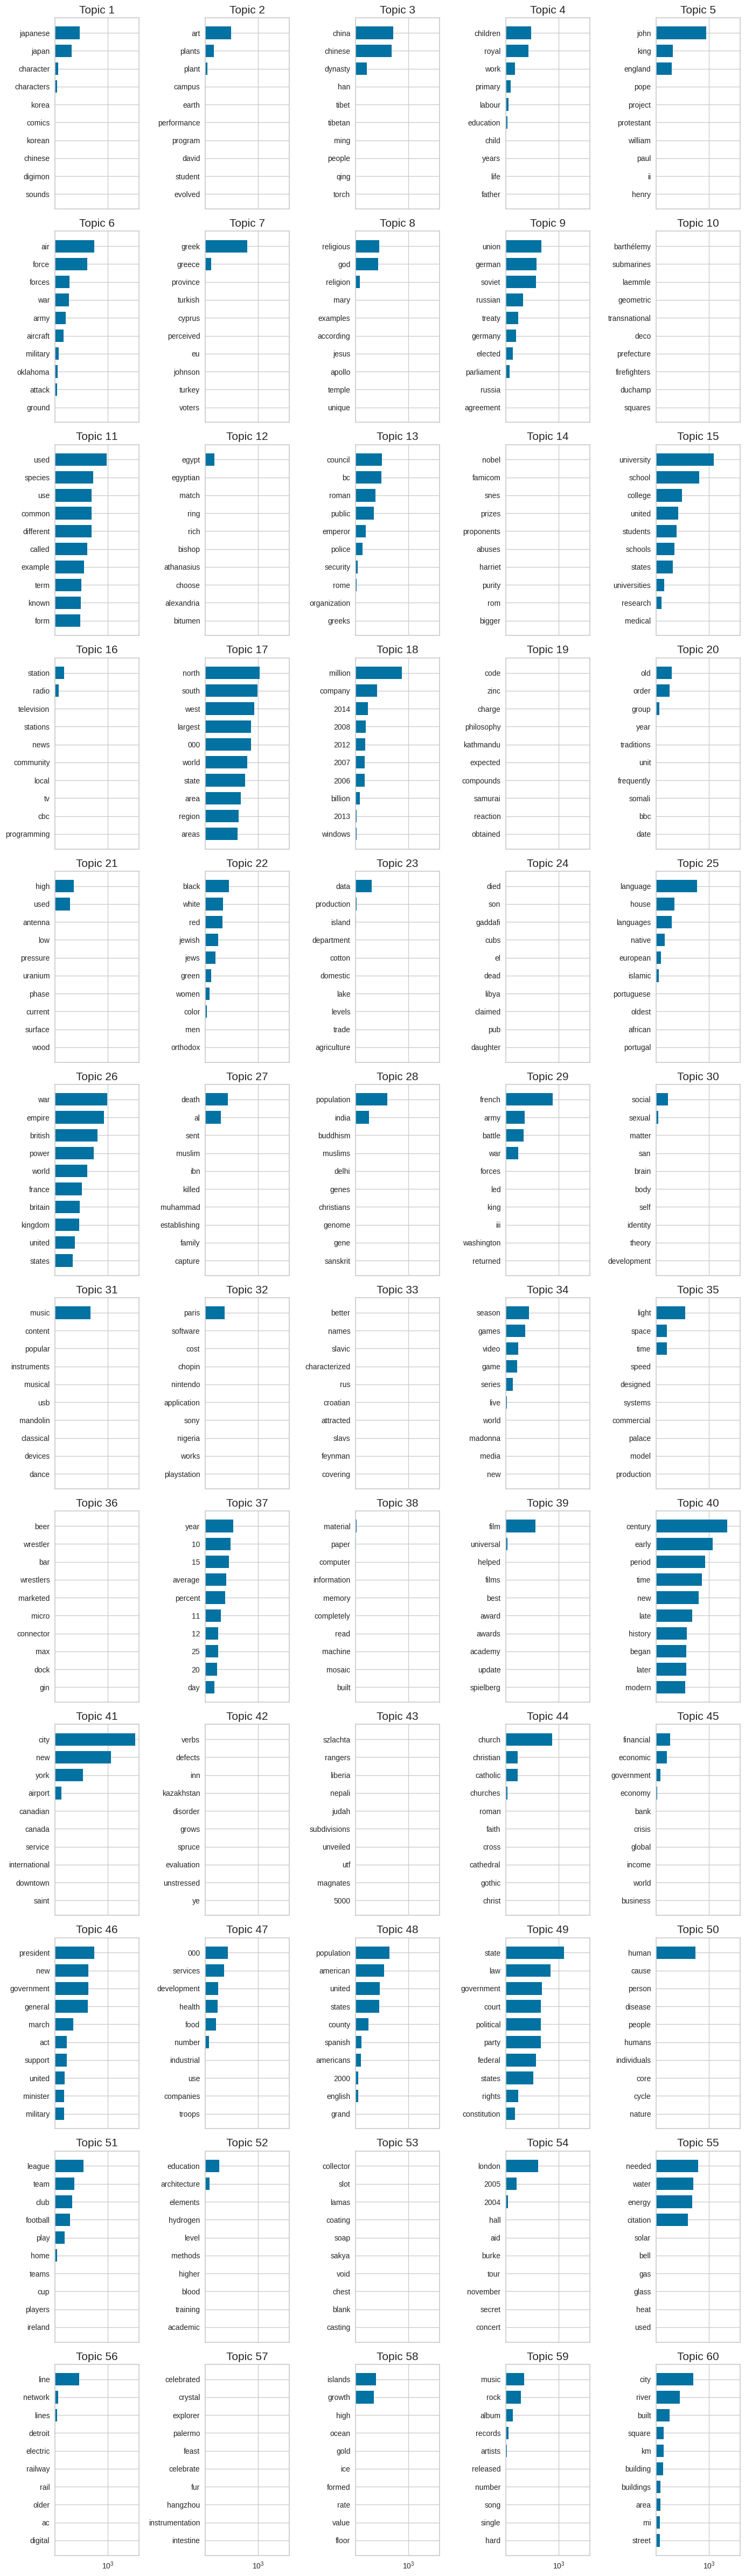

In [41]:
num_words = 10
cols = 5
rows = int(len(lda.components_)/5)

fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows), sharex=True)
axes = axes.flatten()
for topic_idx, topic in enumerate(lda.components_):
    top_terms_index = topic.argsort()[:-num_words - 1:-1]
    top_terms = [vocabulary[i] for i in top_terms_index]
    weights = topic[top_terms_index]
    ax = axes[topic_idx]
    ax.barh(top_terms, weights, height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',fontdict={'fontsize': 15})
    ax.invert_yaxis()
    ax.set_xscale('log')

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.tight_layout()
plt.show()

In the following part we investigate the description of some documents in terms of topics. In fact, each document is characterized by some belonging percentages to each topic.

In [42]:
doc = contexts_train[0]

print(doc)

On 7 July 1994, the Fraunhofer Society released the first software MP3 encoder called l3enc. The filename extension .mp3 was chosen by the Fraunhofer team on 14 July 1995 (previously, the files had been named .bit). With the first real-time software MP3 player WinPlay3 (released 9 September 1995) many people were able to encode and play back MP3 files on their PCs. Because of the relatively small hard drives back in that time (~ 500–1000 MB) lossy compression was essential to store non-instrument based (see tracker and MIDI) music for playback on computer.


In [43]:
doc_vec = vectorizer.transform([doc])[0]
topic_vec = lda.transform(doc_vec)[0]
topic_vec

array([3.03030303e-04, 1.91374127e-02, 3.03030303e-04, 3.03030303e-04,
       3.03030303e-04, 3.03030303e-04, 3.03030303e-04, 3.03030303e-04,
       3.03030303e-04, 3.03030303e-04, 8.48403561e-02, 3.03030303e-04,
       3.03030303e-04, 3.03030303e-04, 3.03030303e-04, 3.03030303e-04,
       3.03030303e-04, 4.69318679e-02, 3.03030303e-04, 3.03030303e-04,
       3.03030303e-04, 3.03030303e-04, 3.03030303e-04, 3.03030303e-04,
       3.03030303e-04, 3.40594440e-01, 3.03030303e-04, 3.03030303e-04,
       3.03030303e-04, 3.03030303e-04, 2.83147037e-02, 6.75817272e-02,
       3.03030303e-04, 3.29206976e-02, 3.03030303e-04, 3.03030303e-04,
       9.92500055e-02, 3.03030303e-04, 3.03030303e-04, 5.23403177e-02,
       3.03030303e-04, 3.03030303e-04, 3.03030303e-04, 3.03030303e-04,
       3.03030303e-04, 3.03030303e-04, 3.22809116e-02, 3.03030303e-04,
       3.03030303e-04, 3.03030303e-04, 1.13852008e-01, 3.03030303e-04,
       3.03030303e-04, 3.03030303e-04, 3.03030303e-04, 3.03030303e-04,
      

In [44]:
sorted_topics = topic_vec.argsort()[::-1]
sorted_prevalence = sorted(topic_vec)[::-1]

After we obtained the vectorization we show here the percentages we talked about above.

In [45]:
for i in range(10):
    if sorted_prevalence[i] < .01: break
    topic = sorted_topics[i]
    sorted_terms = np.flip(lda.components_[topic].argsort())
    print (f'{100 * sorted_prevalence[i]:.1f}% Topic {topic}: {" ".join(vocab[i] for i in sorted_terms[:10])}')

34.1% Topic 25: retreating dan backgrounds maggie rooted drove backed geographical refers pixel
11.4% Topic 50: gran producer britney dorset locating exhaustion producers climbed locke franchises
9.9% Topic 36: rulings 050 1320 antibody leibniz 103 1100 1951 1891 coils
8.5% Topic 10: related pg relate cafe congregate bass derivative promotions germans drafting
6.8% Topic 31: lamarckism penitentiary chihuahuan booming investigations agents performing inventing rooms locomotive
6.7% Topic 58: inquisition nordhausen accept monarchies alloying movies issuing perforated passionate epistemology
5.2% Topic 39: birth creative leo puget intimate gorbachev excluding army gore incident
4.7% Topic 17: immunity calling 1906 190 1904 19 18th assess 1905 roasted
3.3% Topic 33: ordination economics repressive economic overlooked handed rooted helens humidity intimate
3.2% Topic 46: 000 overseeing conditions established dormant issuing filed relate callaghan rationally


### Visualization

In order to visualize the results of this clustering algorithm we use t-SNE (t-distributed Stochastic Neighbor Embedding), which is a non-linear dimensionality reduction technique that acts to preserve the relative distances between nearby objects when building the mapping.

In [46]:
from sklearn.manifold import TSNE

tsne_embedding = TSNE(n_components=3).fit_transform(lda.transform(vector_contexts_test))
tsne_embedding.shape

(5711, 3)

The following two scatter plots show similar considerations to the ones done for the k-means. As before, we espect that points in the same topics are near in the space and colored in the same way.

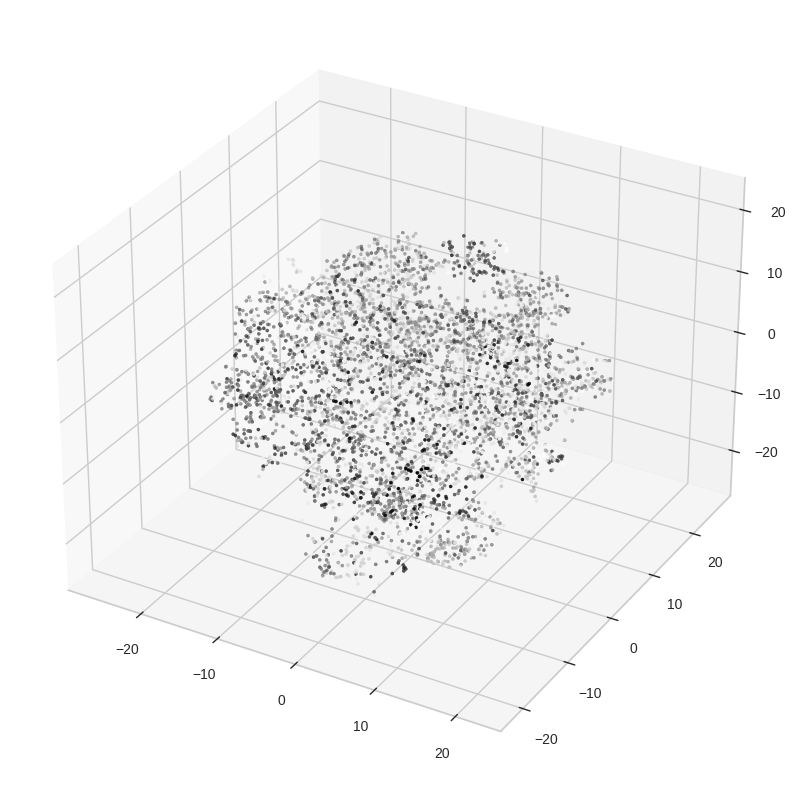

In [47]:
[x, y, z] = np.transpose(tsne_embedding)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=LabelEncoder().fit_transform(label_test), marker='.');

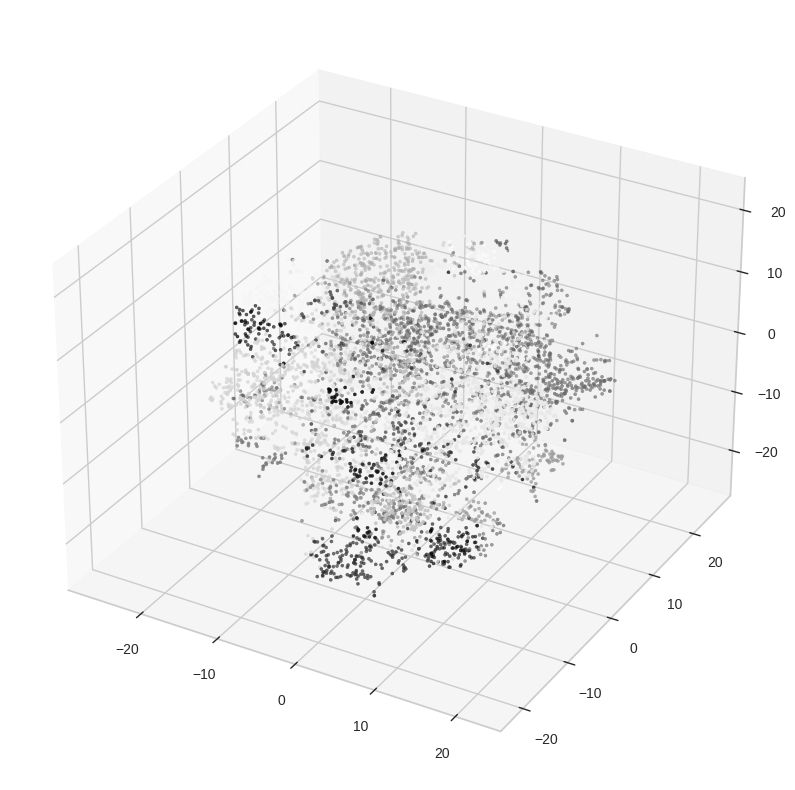

In [48]:
freq_topic = [topic_vec.argsort()[-1] for topic_vec in lda.transform(vector_contexts_test)]

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=freq_topic, marker='.');